In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dog_data = pd.read_csv('NYC_Dog_Licensing_Dataset_20241105.csv')
dog_data.head()

C:\Users\cshar\AppData\Local\Temp\ipykernel_21020\421662572.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dog_data = pd.read_csv('NYC_Dog_Licensing_Dataset_20241105.csv')


,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035.0,09-12-2014,09-12-2017,2016
1,YOGI,M,2010,Boxer,10465.0,09-12-2014,10-02-2017,2016
2,ALI,M,2014,Basenji,10013.0,09-12-2014,09-12-2019,2016
3,QUEEN,F,2013,Akita Crossbreed,10013.0,09-12-2014,09-12-2017,2016
4,LOLA,F,2009,Maltese,10028.0,09-12-2014,10-09-2017,2016


In [3]:
#Data Cleaning
#fixing the warning Pandas gave us by specifying the AnimalBirth column as a string, we will later convert it
dog_data = pd.read_csv('NYC_Dog_Licensing_Dataset_20241105.csv', dtype={'AnimalBirthYear': 'str'}, low_memory=False)

#Converting the dates into Pandas Datetime format
dog_data['LicenseIssuedDate'] = pd.to_datetime(dog_data['LicenseIssuedDate'], errors='coerce')
dog_data['LicenseExpiredDate'] = pd.to_datetime(dog_data['LicenseExpiredDate'], errors='coerce')

#converting AnimalBirthYear to integer and setting any problematic value to NaN using 'coerce'
dog_data['AnimalBirthYear'] = pd.to_numeric(dog_data['AnimalBirthYear'], errors='coerce')

#exploring the total missing values in each column
print(dog_data.isnull().sum())

AnimalName              1387
AnimalGender              21
AnimalBirthYear           30
BreedName                  0
ZipCode                    9
LicenseIssuedDate     370485
LicenseExpiredDate    389919
Extract Year               0
dtype: int64


In [4]:
# I have chosen to drop the missing values
dog_data.dropna(subset=['LicenseIssuedDate', 'LicenseExpiredDate'], inplace=True)
dog_data.dropna(subset=['AnimalGender'], inplace=True)
dog_data.dropna(subset=['ZipCode'], inplace=True)

dog_data.isnull().sum()

AnimalName            498
AnimalGender            0
AnimalBirthYear         9
BreedName               0
ZipCode                 0
LicenseIssuedDate       0
LicenseExpiredDate      0
Extract Year            0
dtype: int64

In [5]:
#Converting the missing values with an 'unknown' value
dog_data['AnimalName'].fillna('Unknown', inplace=True)

# dropping the few birth year values
dog_data.dropna(subset=['AnimalBirthYear'], inplace=True)

dog_data.isnull().sum()

C:\Users\cshar\AppData\Local\Temp\ipykernel_21020\1515028959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dog_data['AnimalName'].fillna('Unknown', inplace=True)


AnimalName            0
AnimalGender          0
AnimalBirthYear       0
BreedName             0
ZipCode               0
LicenseIssuedDate     0
LicenseExpiredDate    0
Extract Year          0
dtype: int64

In [6]:
#Adding a column for dog's age when the license was first issued for it

# Extracting the year from 'LicenseIssuedDate'
dog_data['LicenseIssuedYear'] = dog_data['LicenseIssuedDate'].dt.year

dog_data['AgeAtLicenseIssuance'] = dog_data['LicenseIssuedYear'] - dog_data['AnimalBirthYear']

#basic statistics on the dogs dataset
dog_data.describe()

,AnimalBirthYear,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,LicenseIssuedYear,AgeAtLicenseIssuance
count,152411.000000,152411.000000,152411,152411,152411.000000,152411.000000,152411.000000
mean,2015.403862,10712.539088,2019-07-31 15:59:01.988439296,2021-01-10 18:07:36.203292416,2020.194238,2019.118213,3.714351
min,1912.000000,100.000000,2014-09-12 00:00:00,2016-01-01 00:00:00,2016.000000,2014.000000,-1.000000
25%,2012.000000,10031.000000,2017-09-09 00:00:00,2019-01-03 00:00:00,2017.000000,2017.000000,1.000000
50%,2016.000000,10472.000000,2019-11-02 00:00:00,2021-02-12 00:00:00,2022.000000,2019.000000,2.000000
75%,2019.000000,11226.000000,2021-04-03 00:00:00,2022-11-06 00:00:00,2022.000000,2021.000000,6.000000
max,2023.000000,99508.000000,2023-11-01 00:00:00,2033-08-11 00:00:00,2023.000000,2023.000000,110.000000
std,4.542752,1161.362119,NaN,NaN,2.733206,2.285638,3.890732


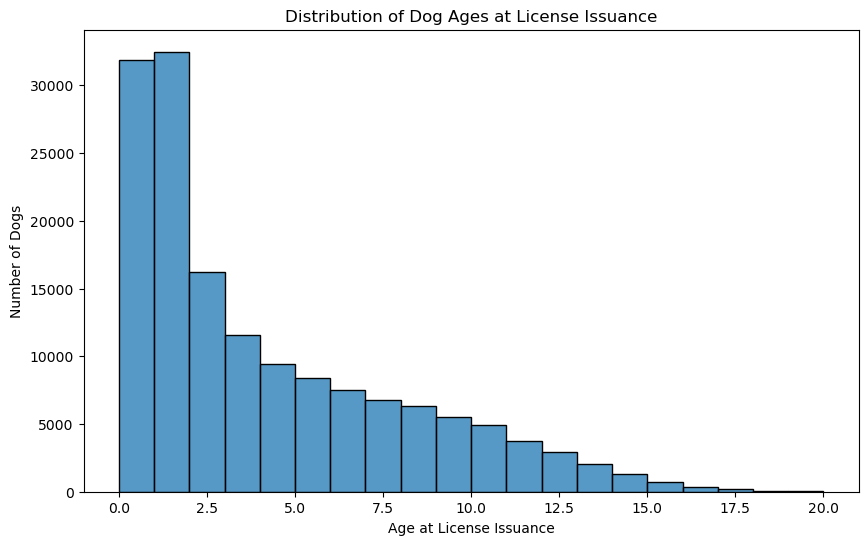

In [22]:
#Filtering out the outliers from the age by setting a max realistic for dogs as 25
dog_data = dog_data[(dog_data['AgeAtLicenseIssuance'] >= 0) & (dog_data['AgeAtLicenseIssuance'] <= 25)]

#Plot 1: Histogram of dog ages at license issuance
plt.figure(figsize=(10, 6))
sns.histplot(dog_data['AgeAtLicenseIssuance'], bins=20)
plt.title('Distribution of Dog Ages at License Issuance')
plt.xlabel('Age at License Issuance')
plt.ylabel('Number of Dogs')
plt.show()


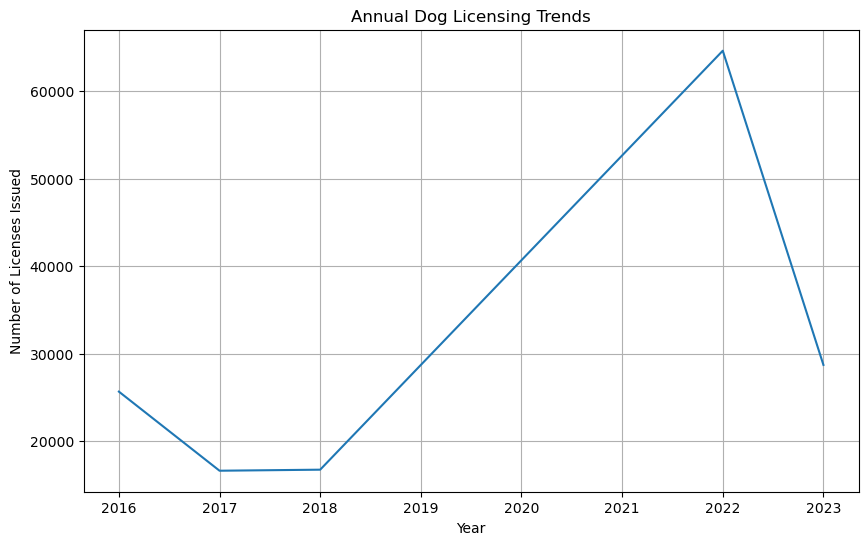

In [38]:
annual_licenses = dog_data['Extract Year'].value_counts().sort_index()

#Plot 2: Line plot for licenses issued each year
plt.figure(figsize=(10, 6))
sns.lineplot(x=annual_licenses.index, y=annual_licenses.values)
plt.title('Annual Dog Licensing Trends')
plt.xlabel('Year')
plt.ylabel('Number of Licenses Issued')
plt.grid(True)
plt.show()